In [31]:
import pandas as pd

def data_export(data):
    print('Veri Seti Özeti :')
    print(data.describe())
    print("\nEksik Veri Kontrolü:")
    print(data.isnull().sum())
data=pd.read_csv('player_segmentation_data (1).csv') 
data_export(data)

Veri Seti Özeti :
        Player_ID  Daily_Play_Time  Purchase_Frequency  Task_Completion  \
count  500.000000       500.000000          500.000000       500.000000   
mean   250.500000         2.027310            0.994000        17.362000   
std    144.481833         0.940883            0.979737         7.192386   
min      1.000000         0.500000            0.000000         5.000000   
25%    125.750000         1.299693            0.000000        11.000000   
50%    250.500000         2.012797            1.000000        18.000000   
75%    375.250000         2.636783            2.000000        24.000000   
max    500.000000         5.852731            5.000000        29.000000   

       Achievements  
count    500.000000  
mean       7.498000  
std        3.945266  
min        1.000000  
25%        4.000000  
50%        8.000000  
75%       11.000000  
max       14.000000  

Eksik Veri Kontrolü:
Player_ID             0
Daily_Play_Time       0
Purchase_Frequency    0
Task_Completio

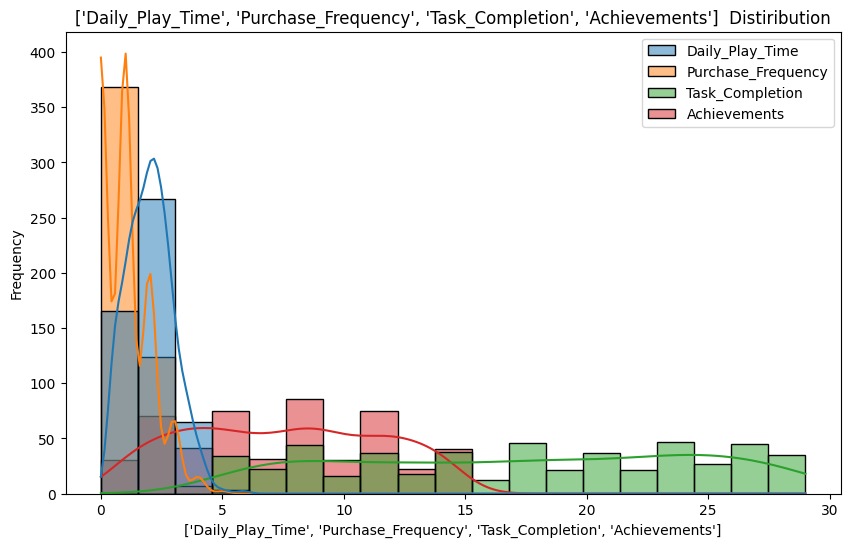

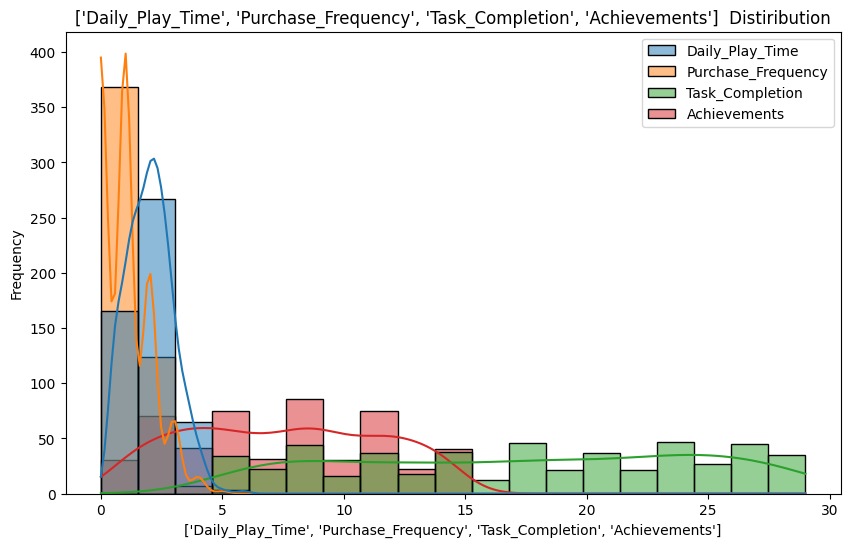

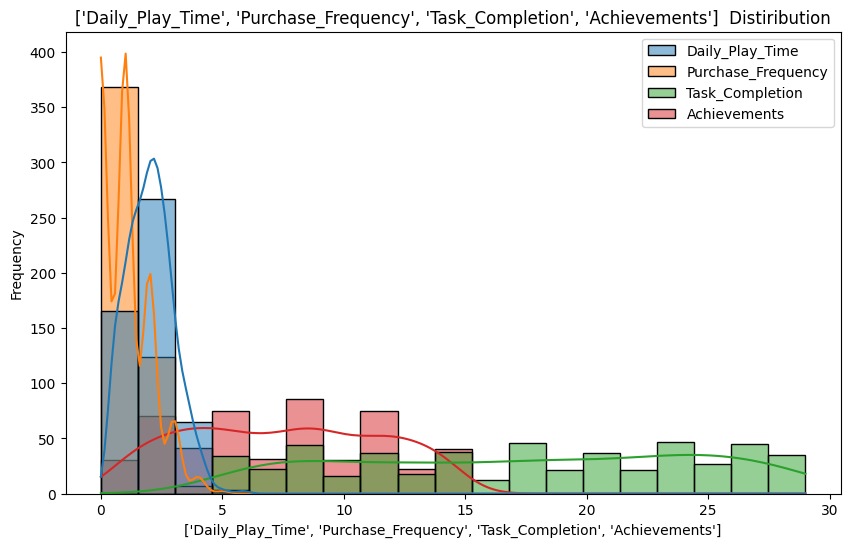

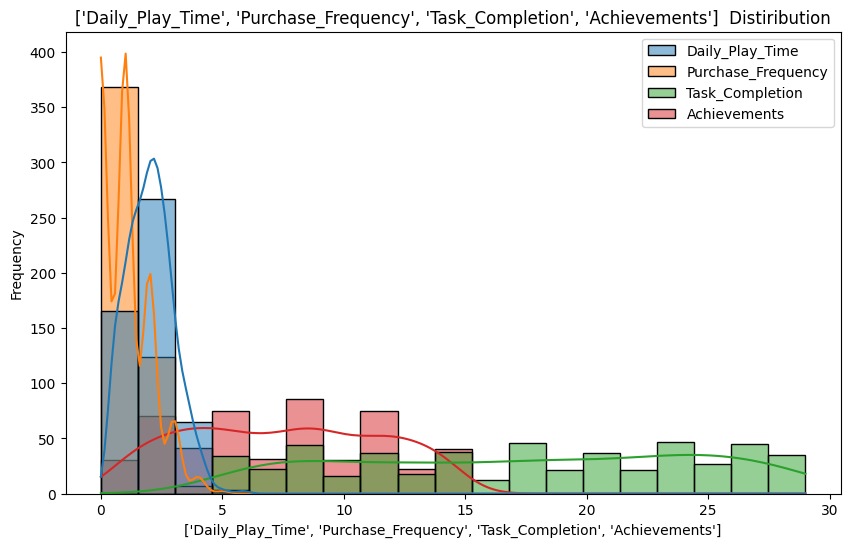

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

#dağılım Görselleştirme 
def plot_destiribution(data):
    feature=['Daily_Play_Time','Purchase_Frequency','Task_Completion','Achievements']
    for fearture in feature:
        plt.figure(figsize=(10,6))
        sns.histplot(data[feature], kde=True)
        plt.title((f"{feature}  Distiribution"))
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

plot_destiribution(data)

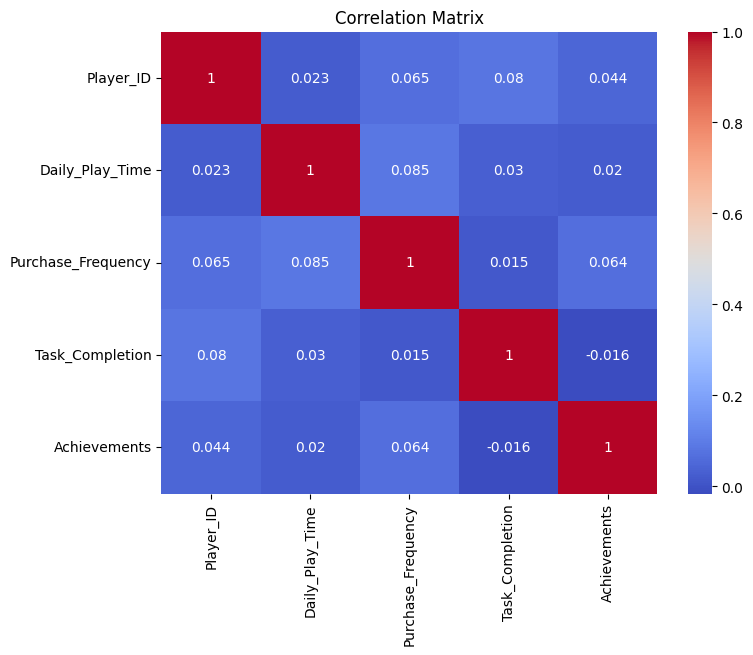

In [33]:
# Korelasyon matrisi görselleştirme fonksiyonu
def plot_correlation_mmatris(Data):
    correlation_matrix=data.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
plot_correlation_mmatris(data)

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def kmeans_segmentation(Data, n_clusters=3):
    #Sadece Analiz Yapmak İstediğimiz Stünları Seçiyoruz
    features= ['Daily_Play_Time', 'Purchase_Frequency', 'Task_Completion', 'Achievements']
    scaler= StandardScaler()
    scaled_data=scaler.fit_transform(data[features])

    # K-means modeli
    kmeans=KMeans(n_clusters=n_clusters, random_state=42)
    data['Segment']=kmeans.fit_predict(scaled_data)

    # Segment ortalamalarını analiz edelim
    print("Segment Ortalamaları:")
    print(data.groupby('Segment').mean())

    return
kmeans_segmentation(data)

Segment Ortalamaları:
          Player_ID  Daily_Play_Time  Purchase_Frequency  Task_Completion  \
Segment                                                                     
0        261.483333         1.762930            0.688889        20.155556   
1        258.569444         2.201548            1.416667        23.166667   
2        232.664773         2.155139            0.960227         9.755682   

         Achievements  
Segment                
0            3.961111  
1           10.659722  
2            8.528409  


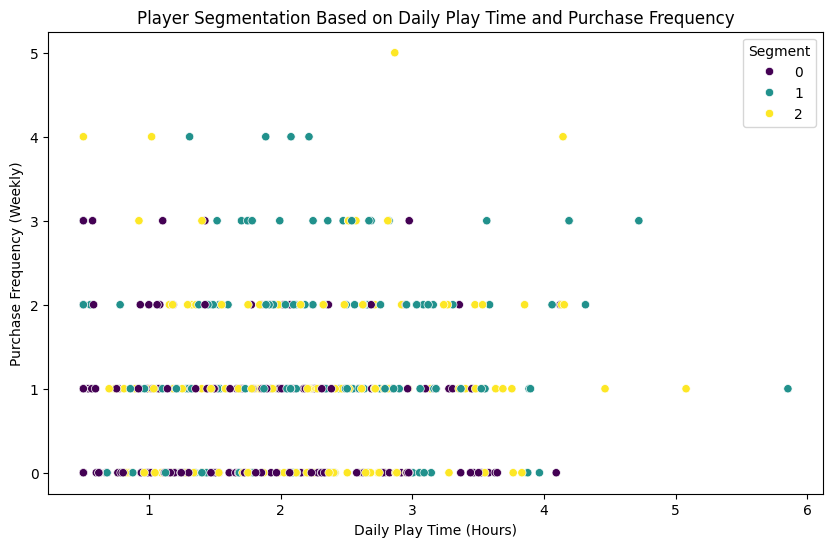

In [35]:
# Segmentleri görselleştirme fonksiyonu
def plot_segments(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Daily_Play_Time', y='Purchase_Frequency', hue='Segment', palette='viridis')
    plt.title("Player Segmentation Based on Daily Play Time and Purchase Frequency")
    plt.xlabel("Daily Play Time (Hours)")
    plt.ylabel("Purchase Frequency (Weekly)")
    plt.legend(title="Segment")
    plt.show()

plot_segments(data)


In [36]:
# Pazarlama stratejisi önerisi fonksiyonu
def suggest_marketing_strategies(data):
    segment_summary = data.groupby('Segment').mean()
    
    for segment in segment_summary.index:
        print(f"\nSegment {segment} Pazarlama Stratejisi:")
        
        # Segment özellikleri
        daily_play_time = segment_summary.loc[segment, 'Daily_Play_Time']
        purchase_frequency = segment_summary.loc[segment, 'Purchase_Frequency']
        
        # Strateji önerileri
        if daily_play_time > 2 and purchase_frequency < 1:
            print("→ Bu segment için oyun içi satın alma kampanyaları önerin.")
        elif daily_play_time < 2 and purchase_frequency > 1:
            print("→ Bu segmentin oyun süresini artırmak için ödüller veya günlük görevler sunun.")
        elif daily_play_time > 2 and purchase_frequency > 1:
            print("→ Bu segment için sadakat programları veya VIP avantajları sunabilirsiniz.")
        else:
            print("→ Bu segment için oyuncu bağlılığını artıracak genel promosyonlar oluşturabilirsiniz.")

suggest_marketing_strategies(data)



Segment 0 Pazarlama Stratejisi:
→ Bu segment için oyuncu bağlılığını artıracak genel promosyonlar oluşturabilirsiniz.

Segment 1 Pazarlama Stratejisi:
→ Bu segment için sadakat programları veya VIP avantajları sunabilirsiniz.

Segment 2 Pazarlama Stratejisi:
→ Bu segment için oyun içi satın alma kampanyaları önerin.


In [44]:
# Yeni Özellik ekleme
def add_new_features(data):
    # Bağımlılık Skoru: Günlük oyun süresi ve tamamlanan görev sayısına göre bir skor
    data['Addiction_Score']= data['Daily_Play_Time'] * data['Task_Completion']

    # Harcama Potansiyeli: Satın alma sıklığı ve başarı sayısına göre bir skor
    data['Spending_Potential'] = data['Purchase_Frequency'] * data['Achievements']

    return data
add_new_features(data)
data[['Player_ID','Addiction_Score','Spending_Potential']].head()


,Player_ID,Addiction_Score,Spending_Potential
0,1,72.404710,26
1,2,24.202564,10
2,3,13.238443,0
3,4,52.845448,0
4,5,12.360926,0


In [45]:
data[['Player_ID','Addiction_Score','Spending_Potential']].tail()

,Player_ID,Addiction_Score,Spending_Potential
495,496,35.544741,42
496,497,6.739277,0
497,498,32.573904,0
498,499,25.860780,0
499,500,5.554802,0


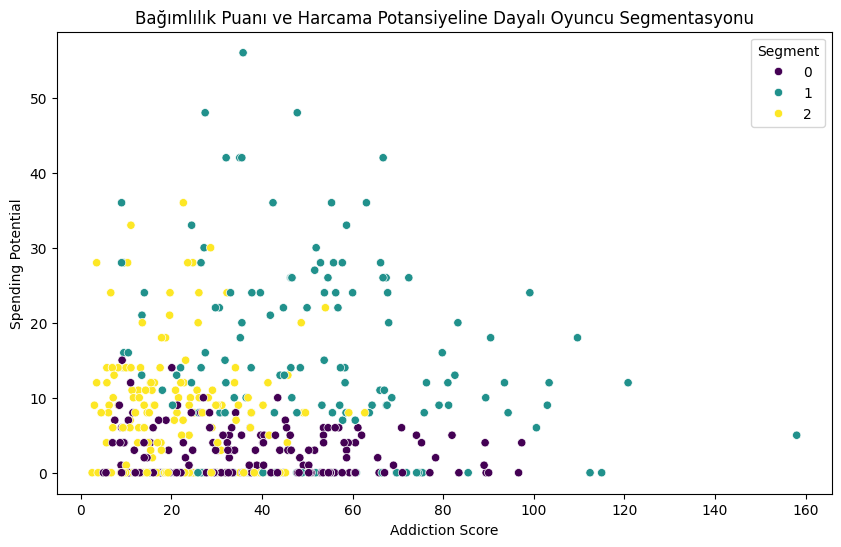

In [50]:
# Yeni Segmentleri Görselleştirme 
def plot_custom_segments(data):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=data, x='Addiction_Score', y='Spending_Potential', hue='Segment', palette='viridis')
    plt.title('Bağımlılık Puanı ve Harcama Potansiyeline Dayalı Oyuncu Segmentasyonu')
    plt.xlabel( "Addiction Score")
    plt.ylabel("Spending Potential")
    plt.legend(title="Segment")
    plt.show()

plot_custom_segments(data)


In [56]:
# Gelişmiş churn analizi fonksiyonu
def advanced_predict_churn(data):
    # Churn riskini belirlemek için daha fazla kriter ekleyelim
    
    # Günlük oyun süresi düşük ve satın alma sıklığı sıfır olanları churn olarak işaretleyelim
    data['Churn_Risk'] = (data['Daily_Play_Time'] < 1) & (data['Purchase_Frequency'] == 0)
    
    # Uzun süredir görevlere katılmayan oyuncular
    data['Churn_Risk'] |= (data['Task_Completion'] < 1)
    
    # Çok düşük başarı sayısı olan oyuncuları ekleyelim
    data['Churn_Risk'] |= (data['Achievements'] < 2)
    
    # Yüksek churn riski olan oyuncuların sayısını ekrana yazdır
    churn_count = data['Churn_Risk'].sum()
    print(f"Gelişmiş churn analizi ile belirlenen churn riski yüksek oyuncu sayısı: {churn_count}")
    
    return data

advanced_predict_churn(data)
data[['Player_ID', 'Daily_Play_Time', 'Purchase_Frequency', 'Task_Completion', 'Achievements', 'Churn_Risk']].head()


Gelişmiş churn analizi ile belirlenen churn riski yüksek oyuncu sayısı: 58


,Player_ID,Daily_Play_Time,Purchase_Frequency,Task_Completion,Achievements,Churn_Risk
0,1,2.496714,2,29,13,False
1,2,1.861736,2,13,5,False
2,3,2.647689,0,5,4,False
3,4,3.523030,0,15,1,True
4,5,1.765847,0,7,5,False


In [58]:
# Pazarlama stratejileri fonksiyonu
def detailed_marketing_suggestions(data):
    segment_summary = data.groupby('Segment').mean()
    
    for segment in segment_summary.index:
        print(f"\nSegment {segment} Pazarlama Stratejileri:")
        
        # Segment özellikleri
        addiction_score = segment_summary.loc[segment, 'Addiction_Score']
        spending_potential = segment_summary.loc[segment, 'Spending_Potential']
        churn_risk_percentage = data[data['Segment'] == segment]['Churn_Risk'].mean()
        
        # Strateji önerileri
        print(f"→ Churn riski: %{churn_risk_percentage * 100:.2f} oranında")
        
        if addiction_score > 10 and spending_potential < 10:
            print("→ Sadakat ödülleri sunarak harcama potansiyelini artırın.")
        elif addiction_score < 10 and spending_potential > 10:
            print("→ Daha fazla oyun içi aktiviteye katılım sağlamak için günlük görevler sunun.")
        elif addiction_score > 10 and spending_potential > 10:
            print("→ VIP sadakat programlarıyla bu oyuncuları elde tutun.")
        else:
            print("→ Oyun süresini artırmaya yönelik özel içerikler veya promosyonlar sunun.")

# Churn analizi uygulayıp, pazarlama stratejilerini önerelim
advanced_predict_churn(data)
detailed_marketing_suggestions(data)

Gelişmiş churn analizi ile belirlenen churn riski yüksek oyuncu sayısı: 58

Segment 0 Pazarlama Stratejileri:
→ Churn riski: %25.00 oranında
→ Sadakat ödülleri sunarak harcama potansiyelini artırın.

Segment 1 Pazarlama Stratejileri:
→ Churn riski: %2.08 oranında
→ VIP sadakat programlarıyla bu oyuncuları elde tutun.

Segment 2 Pazarlama Stratejileri:
→ Churn riski: %5.68 oranında
→ Sadakat ödülleri sunarak harcama potansiyelini artırın.
